<a href="https://colab.research.google.com/github/wojciechnowaczyk/Statystyka/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Temat Projektu: Liczba chrztów udzielonych w latach 1990–2023. </br>
Zbiorowością statystyczną są dzieci w wieku 0–7 lat ochrzczone w latach 1990–2023 w Polsce. </br>
Badaną cechą jest liczba chrztów w poszczególnych latach.

In [13]:
years = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
baptismsAmount = [569000, 547700, 530000, 510000, 490000, 438461, 419513, 410749, 396207, 389892, 379371, 367765, 354277, 343912, 342613, 352070, 353512, 366881, 387949, 397454, 392598, 383486, 377972, 374248, 373670, 369397, 374279, 392446, 386565, 372851, 312082, 315357, 302200, 267150]
baptisms_df = pd.DataFrame({'years': years, 'baptismsAmount': baptismsAmount})
baptisms_df

,years,baptismsAmount
0,1990,569000
1,1991,547700
2,1992,530000
3,1993,510000
4,1994,490000
5,1995,438461
6,1996,419513
7,1997,410749
8,1998,396207
9,1999,389892


In [14]:
#korelacja
correlation = baptisms_df['years'].corr(baptisms_df['baptismsAmount'])
print(correlation)

-0.7709166983581129


Korelacja wynosi -0,77, co oznacza silną negatywną zależność między rokiem, a liczbą chrztów. Korelacja może wahać się w zakresie od -1 do 1, korelacja blizko -1 oznacza wyraźny trend spadkowy.

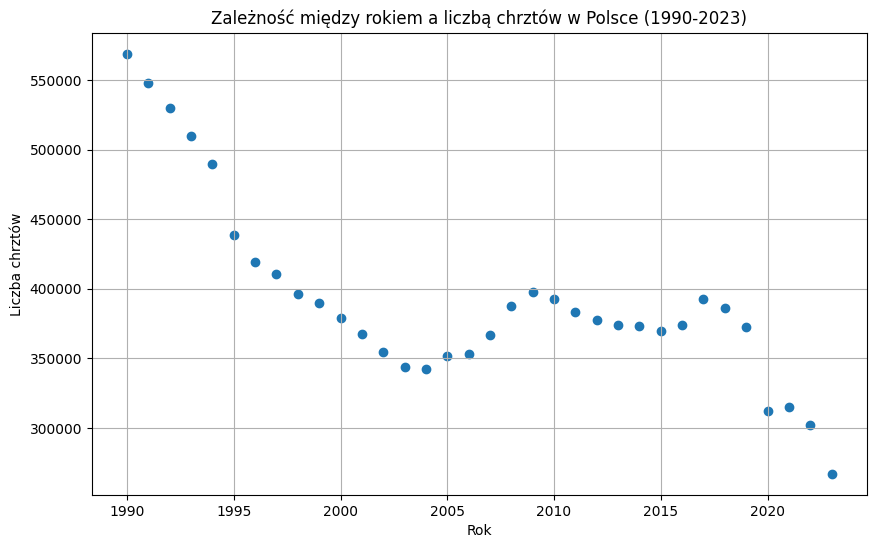

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(baptisms_df['years'], baptisms_df['baptismsAmount'])
plt.xlabel('Rok')
plt.ylabel('Liczba chrztów')
plt.title('Zależność między rokiem a liczbą chrztów w Polsce (1990-2023)')
plt.grid(True)
plt.show()

[-5.22202918e+03  1.08704023e+07]


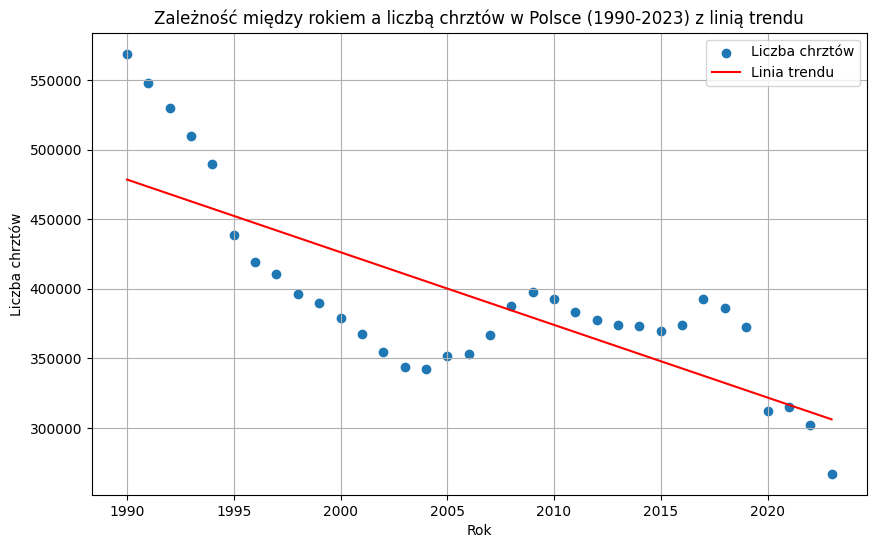

In [17]:
# linia trendu
a = np.polyfit(baptisms_df['years'], baptisms_df['baptismsAmount'], 1)
print(a)
trend_line = np.poly1d(a)

plt.figure(figsize=(10, 6))
plt.scatter(baptisms_df['years'], baptisms_df['baptismsAmount'], label='Liczba chrztów')
plt.plot(baptisms_df['years'], trend_line(baptisms_df['years']), color='red', label='Linia trendu')
plt.xlabel('Rok')
plt.ylabel('Liczba chrztów')
plt.title('Zależność między rokiem a liczbą chrztów w Polsce (1990-2023)')
plt.grid(True)
plt.legend()
plt.show()

Współczynnik regresji: około **-5222**. </br>
Średnio z każdym kolejnym rokiem liczba chrztów w Polsce spada o około 5222.

In [18]:
#współczynnik determinacji
r_squared = correlation**2
print(r_squared)

# Współczynnik indeterminacji
indetermination = 1 - r_squared
print(indetermination)


0.5943125558073737
0.40568744419262626


Współczynnik determinacji: **0,59**. </br>
Współczynnik determinacji oznacza, że około 59% zmienności liczby chrztów jest przedstawione przez zmienność w czasie za pomocą linii trendu w powyższym modelu. Jest to wysoka wartośc, która oznacza, że rok jest istotnym czynnikiem w zmienności chrztów</br>
</br>
Współczynnik indeterminacji: **0,41**. </br>
Współczynnik indeterminacji oznacza, że około 41% zmienności liczby chrztów pozostaje niewyjaśnione przez powyższy model. Może to wynikać z wpływu innych czynników np zmian ekonomicznych lub społecznych.

In [19]:
predicted_baptisms = trend_line(baptisms_df['years'])
residuals = baptisms_df['baptismsAmount'] - predicted_baptisms
std_dev_residuals = np.std(residuals)

print(std_dev_residuals)


42328.023942833264


Odchylenie standardowe składnika resztowego: 42328. </br>
Średnio, rzeczywista liczba chrztów różni się od wartości przewidzianych przez linię trendu o około 42328.

In [20]:
# Prognoza na lata 2024-2027
forecast_years = np.array([2024, 2025, 2026, 2027])
predicted_baptisms_forecast = trend_line(forecast_years)
forecast_df = pd.DataFrame({
    'Rok': forecast_years,
    'Prognozowana liczba chrztów': predicted_baptisms_forecast.round(0).astype(int)
})

display(forecast_df)

,Rok,Prognozowana liczba chrztów
0,2024,301015
1,2025,295793
2,2026,290571
3,2027,285349


Prognoza liczby chrztów na lata 2024-2027 wygląda następująco - 2024: 301015, 2025: 295793, 2026: 290571, 2027: 285349. </br>
Prognoza przewiduje dalszy trend spadkowy liczby chrztów w kolejnych latach.